#  BAD Day 1: Tutorial 

# 0. Source the needed packages


In [ ]:
# In case you need to install the packages
install.packages("xlsx")
install.packages("gdata")
install.packages("ape")



In [ ]:
source("http://bioconductor.org/biocLite.R");
biocLite("multtest");

# 1. Exploratory data analysis

We will be usig the Gene Expression dataset from Golub et al (1999). The gene expression data collected by Golub et al. (1999) are among the most classical in bioinformatics. A selection of the set is called `golub` which is contained in the `multtest` package loaded before. 


The data consist of gene expression values of 3051 genes (rows) from 38 leukemia patients Pre-processing was done as described in Dudoit et al. (2002). The R code for pre-processing is available in the file ../doc/golub.R.

**Source**: 
Golub et al. (1999). Molecular classification of cancer: class discovery and class prediction by gene expression monitoring, Science, Vol. 286:531-537. http://www-genome.wi.mit.edu/MPR/ .

In [34]:
require(multtest);

# Usage
data(golub)

# If you need more information on the data set just
# uncomment the line below
# ?golub

Data set values:
- `golub`: matrix of gene expression levels for the 38 tumor mRNA samples, rows correspond to genes (3051 genes) and columns to mRNA samples.
- `golub.cl`: numeric vector indicating the tumor class, 27 acute lymphoblastic leukemia (ALL) cases (code 0) and 11 acute myeloid leukemia (AML) cases (code 1).
- `golub.names`: a matrix containing the names of the 3051 genes for the expression matrix golub. The three columns correspond to the gene index, ID, and Name, respectively.

In [4]:
# Checking the dimension of the data
dim(golub)

[1] 3051   38

In [5]:
# we will have a look at the first rows contained in the data set
head(golub)

-1.45769,-1.39420,-1.42779,-1.40715,-1.42668,-1.21719,-1.37386,-1.36832,-1.47649,-1.21583,⋯,-1.08902,-1.29865,-1.26183,-1.44434,1.10147,-1.34158,-1.22961,-0.75919,0.84905,-0.66465
-0.75161,-1.26278,-0.09052,-0.99596,-1.24245,-0.69242,-1.37386,-0.50803,-1.04533,-0.81257,⋯,-1.08902,-1.05094,-1.26183,-1.25918,0.97813,-0.79357,-1.22961,-0.71792,0.45127,-0.45804
0.45695,-0.09654,0.90325,-0.07194,0.03232,0.09713,-0.11978,0.23381,0.23987,0.44201,⋯,-0.43377,-0.10823,-0.29385,0.05067,1.69430,-0.12472,0.04609,0.24347,0.90774,0.46509
3.13533,0.21415,2.08754,2.23467,0.93811,2.24089,3.36576,1.97859,2.66468,-1.21583,⋯,0.29598,-1.29865,2.76869,2.08960,0.70003,0.13854,1.75908,0.06151,1.30297,0.58186
2.76569,-1.27045,1.60433,1.53182,1.63728,1.85697,3.01847,1.12853,2.17016,-1.21583,⋯,-1.08902,-1.29865,2.00518,1.17454,-1.47218,-1.34158,1.55086,-1.18107,1.01596,0.15788
2.64342,1.01416,1.70477,1.63845,-0.36075,1.73451,3.36576,0.96870,2.72368,-1.21583,⋯,-1.08902,-1.29865,1.73780,0.89347,-0.52883,-1.22168,0.90832,-1.39906,0.51266,1.36249


The gene names are collected in the matrix golub.gnames of which the columns correspond to the gene index, ID, and Name, respectively.

In [36]:
# Adding 3051 gene names
row.names(golub) = golub.gnames[,3]

head(golub)

AFFX-HUMISGF3A/M97935_MA_at,-1.45769,-1.39420,-1.42779,-1.40715,-1.42668,-1.21719,-1.37386,-1.36832,-1.47649,-1.21583,⋯,-1.08902,-1.29865,-1.26183,-1.44434,1.10147,-1.34158,-1.22961,-0.75919,0.84905,-0.66465
AFFX-HUMISGF3A/M97935_MB_at,-0.75161,-1.26278,-0.09052,-0.99596,-1.24245,-0.69242,-1.37386,-0.50803,-1.04533,-0.81257,⋯,-1.08902,-1.05094,-1.26183,-1.25918,0.97813,-0.79357,-1.22961,-0.71792,0.45127,-0.45804
AFFX-HUMISGF3A/M97935_3_at,0.45695,-0.09654,0.90325,-0.07194,0.03232,0.09713,-0.11978,0.23381,0.23987,0.44201,⋯,-0.43377,-0.10823,-0.29385,0.05067,1.69430,-0.12472,0.04609,0.24347,0.90774,0.46509
AFFX-HUMRGE/M10098_5_at,3.13533,0.21415,2.08754,2.23467,0.93811,2.24089,3.36576,1.97859,2.66468,-1.21583,⋯,0.29598,-1.29865,2.76869,2.08960,0.70003,0.13854,1.75908,0.06151,1.30297,0.58186
AFFX-HUMRGE/M10098_M_at,2.76569,-1.27045,1.60433,1.53182,1.63728,1.85697,3.01847,1.12853,2.17016,-1.21583,⋯,-1.08902,-1.29865,2.00518,1.17454,-1.47218,-1.34158,1.55086,-1.18107,1.01596,0.15788
AFFX-HUMRGE/M10098_3_at,2.64342,1.01416,1.70477,1.63845,-0.36075,1.73451,3.36576,0.96870,2.72368,-1.21583,⋯,-1.08902,-1.29865,1.73780,0.89347,-0.52883,-1.22168,0.90832,-1.39906,0.51266,1.36249


Twenty seven patients are diagnosed as acute lymphoblastic leukemia (ALL) and eleven as acute myeloid leukemia (AML). The tumor class is given by the numeric vector golub.cl, where ALL is indicated by 0 and AML by 1. 

In [7]:
colnames(golub) = golub.cl

head(golub)

,0,0,0,0,0,0,0,0,0,0,⋯,1,1,1,1,1,1,1,1,1,1
AFFX-HUMISGF3A/M97935_MA_at,-1.45769,-1.39420,-1.42779,-1.40715,-1.42668,-1.21719,-1.37386,-1.36832,-1.47649,-1.21583,⋯,-1.08902,-1.29865,-1.26183,-1.44434,1.10147,-1.34158,-1.22961,-0.75919,0.84905,-0.66465
AFFX-HUMISGF3A/M97935_MB_at,-0.75161,-1.26278,-0.09052,-0.99596,-1.24245,-0.69242,-1.37386,-0.50803,-1.04533,-0.81257,⋯,-1.08902,-1.05094,-1.26183,-1.25918,0.97813,-0.79357,-1.22961,-0.71792,0.45127,-0.45804
AFFX-HUMISGF3A/M97935_3_at,0.45695,-0.09654,0.90325,-0.07194,0.03232,0.09713,-0.11978,0.23381,0.23987,0.44201,⋯,-0.43377,-0.10823,-0.29385,0.05067,1.69430,-0.12472,0.04609,0.24347,0.90774,0.46509
AFFX-HUMRGE/M10098_5_at,3.13533,0.21415,2.08754,2.23467,0.93811,2.24089,3.36576,1.97859,2.66468,-1.21583,⋯,0.29598,-1.29865,2.76869,2.08960,0.70003,0.13854,1.75908,0.06151,1.30297,0.58186
AFFX-HUMRGE/M10098_M_at,2.76569,-1.27045,1.60433,1.53182,1.63728,1.85697,3.01847,1.12853,2.17016,-1.21583,⋯,-1.08902,-1.29865,2.00518,1.17454,-1.47218,-1.34158,1.55086,-1.18107,1.01596,0.15788
AFFX-HUMRGE/M10098_3_at,2.64342,1.01416,1.70477,1.63845,-0.36075,1.73451,3.36576,0.96870,2.72368,-1.21583,⋯,-1.08902,-1.29865,1.73780,0.89347,-0.52883,-1.22168,0.90832,-1.39906,0.51266,1.36249


## Creating the exploratory plots

### 1.1\. Plotting the value of gene (CCND3) in all nRNA samples (M92287_at)

We shall first have a look at the expression values of a gener with manufacurer name `M92278_at`w, hich is known in biology as "CCND3 Cyclin D3".

The expression values of this gene are collected in row 1042 of golub. To load the data and to obtain the relevant information from row 1042 of golub.gnames, use the following:

In [38]:
mygene <- golub[1042, ]

The data has now been stored in the `golub` matrix. We will now plot the expression values od the gene CCND3 Cyclin D3.

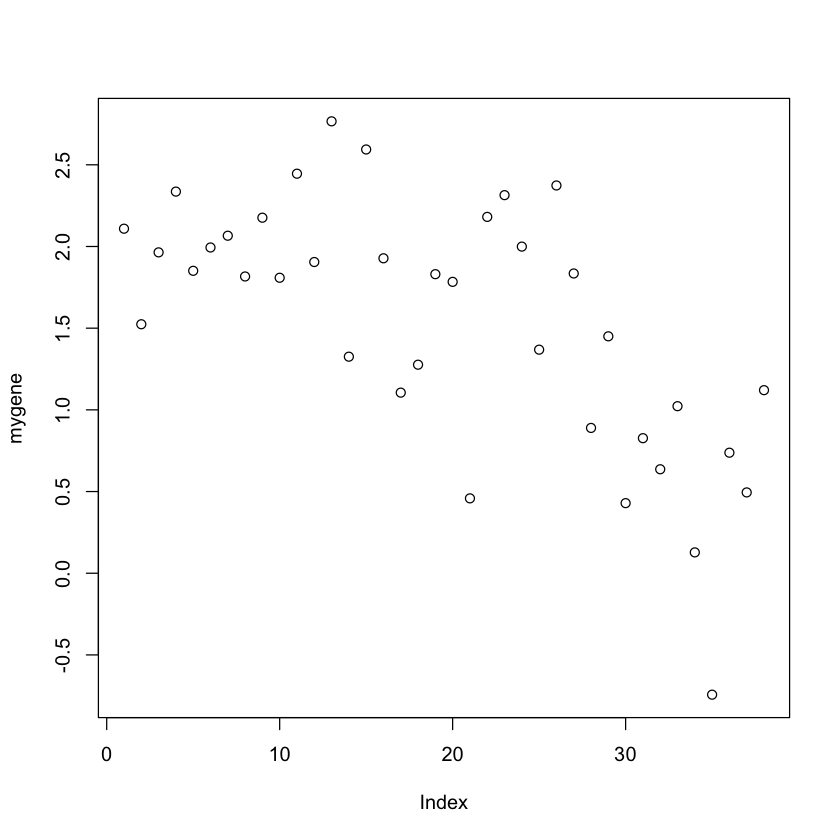

In [41]:
plot(mygene)

In the previous plot we just used the default plotting preferences within R base plotting.We can do some improvements so that the plot is easily understood.

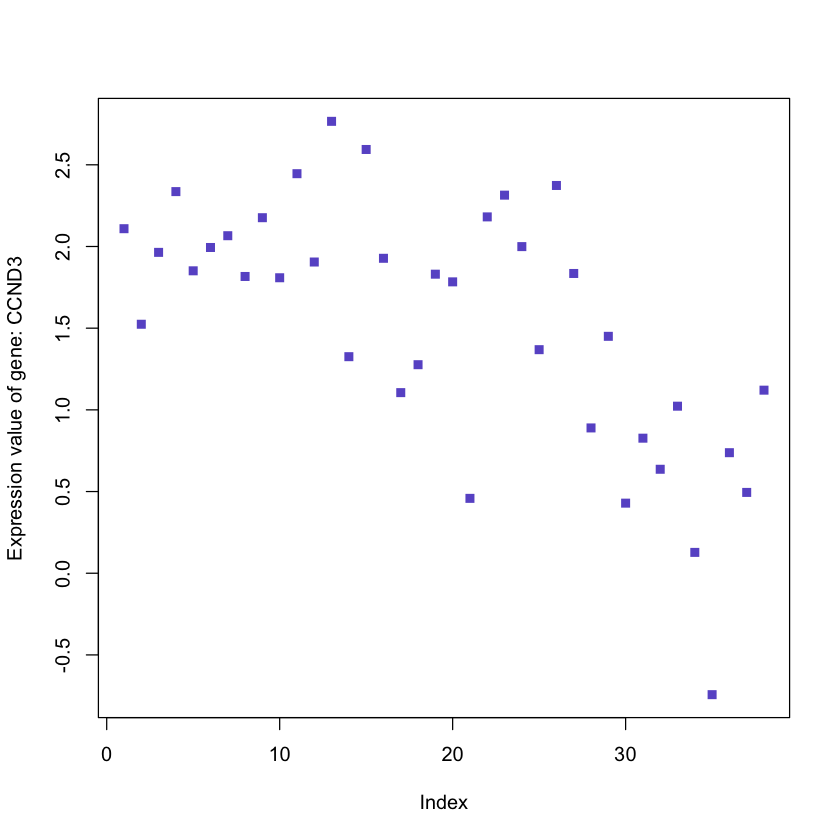

In [43]:
plot(mygene, pch = 15, col = 'slateblue', ylab = 'Expression value of gene: CCND3')

In this plot the vertical axis corresponds to the size of the expression values and the horizontal axis the index of the patients. 

### 1.2\. Gene expression between patient 1 (ALL) and patient 38 (AML) 

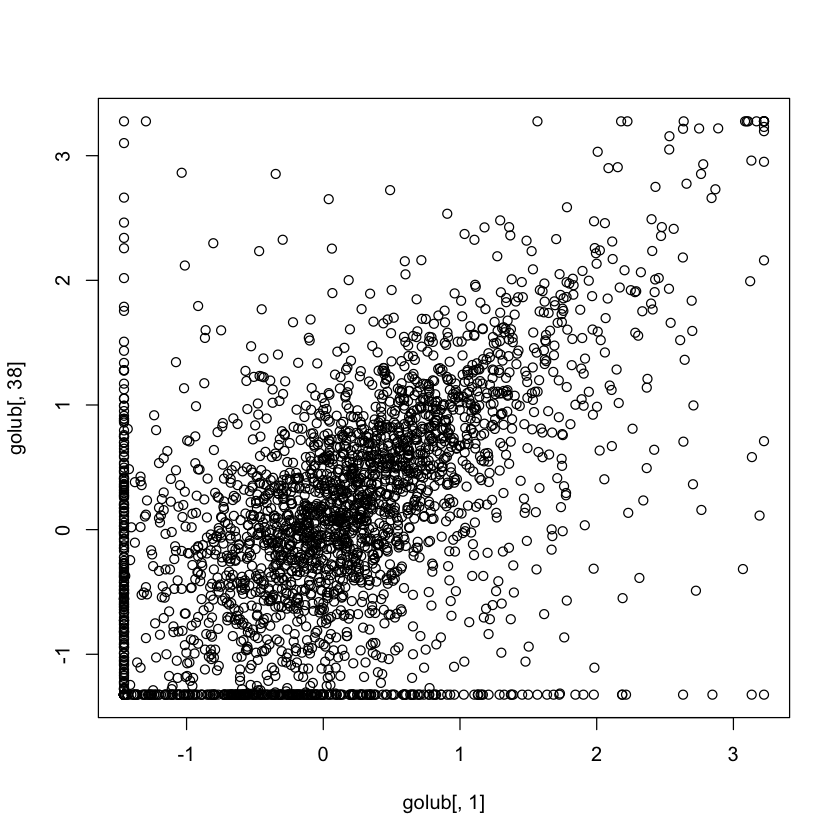

In [10]:
plot(golub[,1], golub[,38])

Adding diagonal lines to the plot and changing axes labels


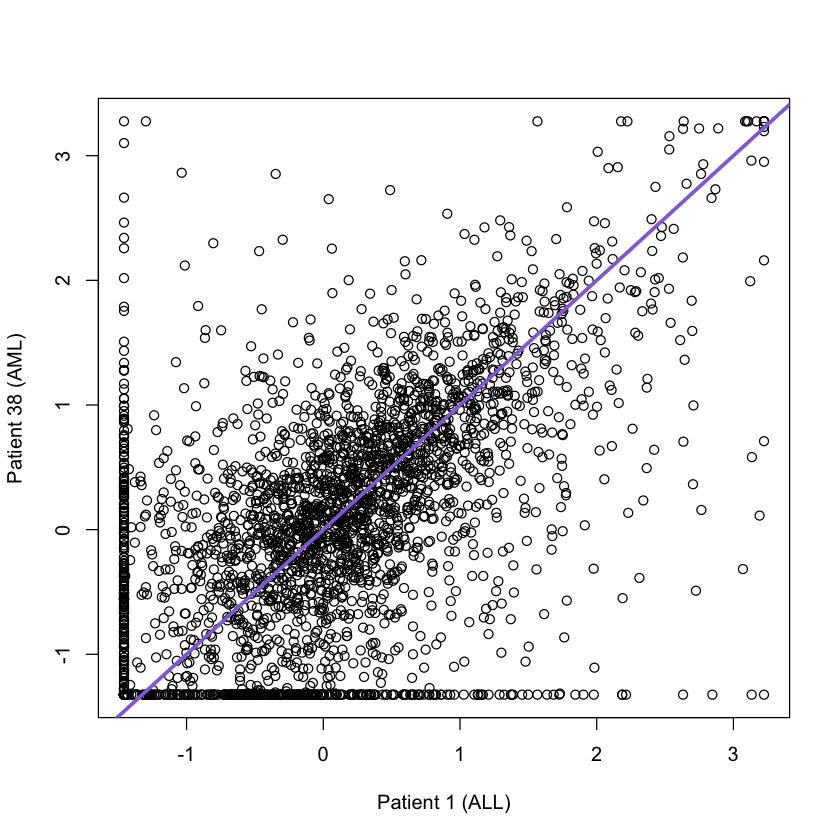

In [11]:
plot(golub[,1], golub[,38], xlab = 'Patient 1 (ALL)', ylab = 'Patient 38 (AML)') 
abline(a = 0, b = 1, col = 'mediumpurple', lwd =3)

### 1.3\. Scatter plots to detect independence


In [12]:
mysamplist <- golub[, c(1:15)]
colnames(mysamplist) = c(1:15)

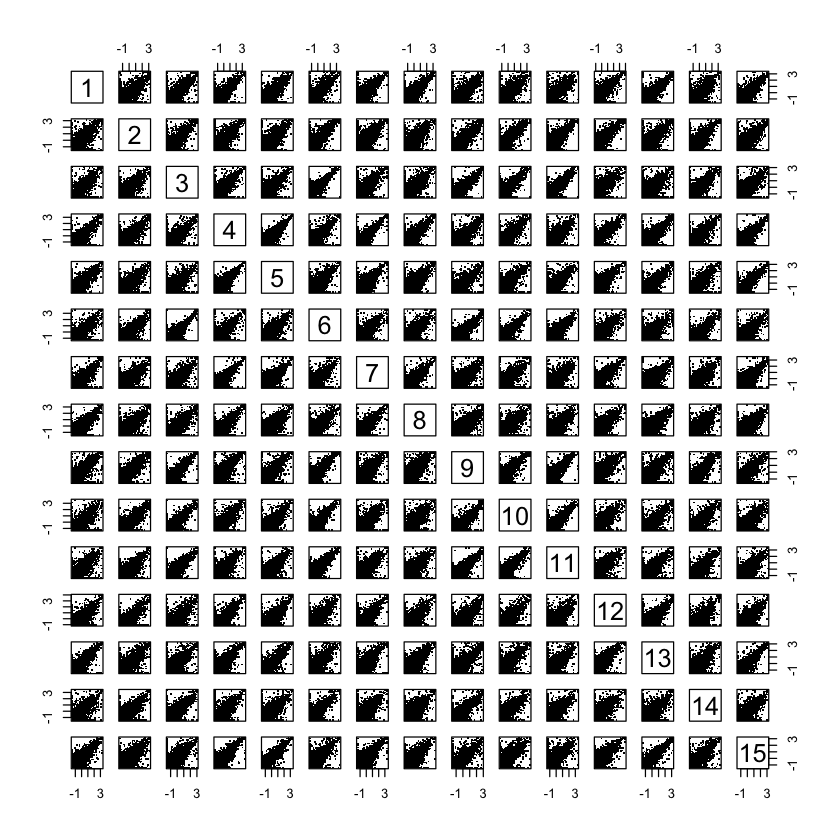

In [13]:
plot(as.data.frame(mysamplist), pch='.')

### 1.4\. Bar plot of 4 cycline genes expression values in 3 ALL and AML patients

In [14]:
mygenelist <- golub[c(85, 1042, 1212, 2240), c(1:3, 36:38)]

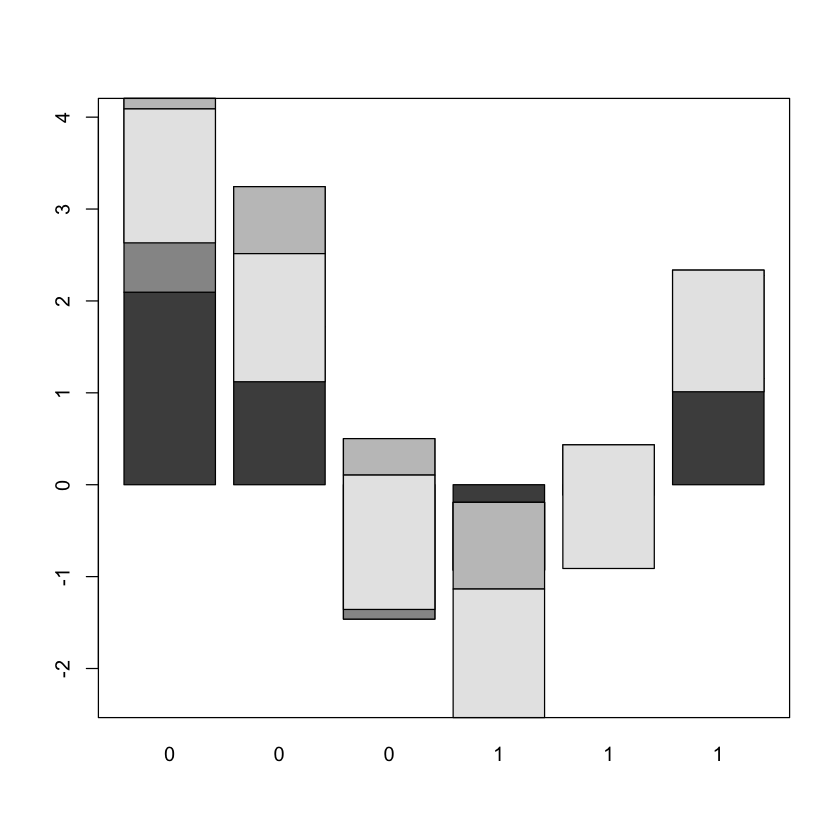

In [15]:
barplot(mygenelist)
box()

Let's have a look at the `barplot` arguments:


In [16]:
?barplot

We are going to focus on only a few of the histgram arguments:
- `beside`: `TRUE` for the bars to be displayed as justapoxed bars, `FALSE` for stacked bars
- `horiz` : `FALSE` bars displayed vertically with the first bar to the left, `TRUE` bars are displayed horizontally with the first at the bottom.
- `ylim`, `xlim` :  limits for the y and x axes
- `col`: colour choices

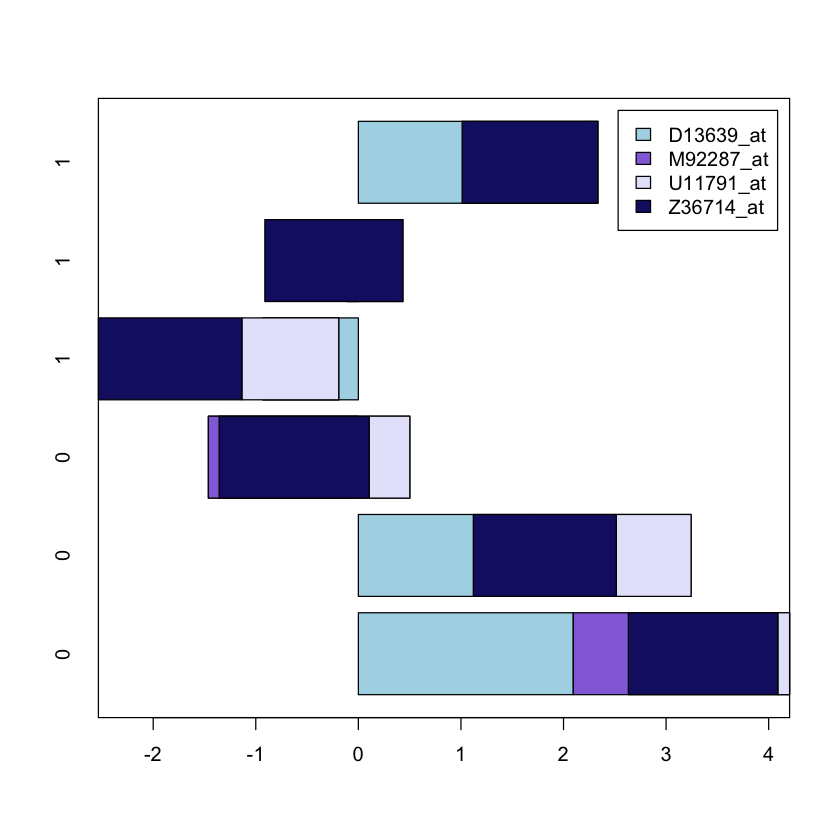

In [17]:
# custom colours 
colours = c('lightblue',  'mediumpurple', 'lavender', 'midnightblue')
barplot(mygenelist, horiz = TRUE, 
        col = colours, legend = TRUE)
box()

You can also use the barplots to represent the mean and standard error which we will be doing in the following sections.

### 1.5\. Plotting the mean

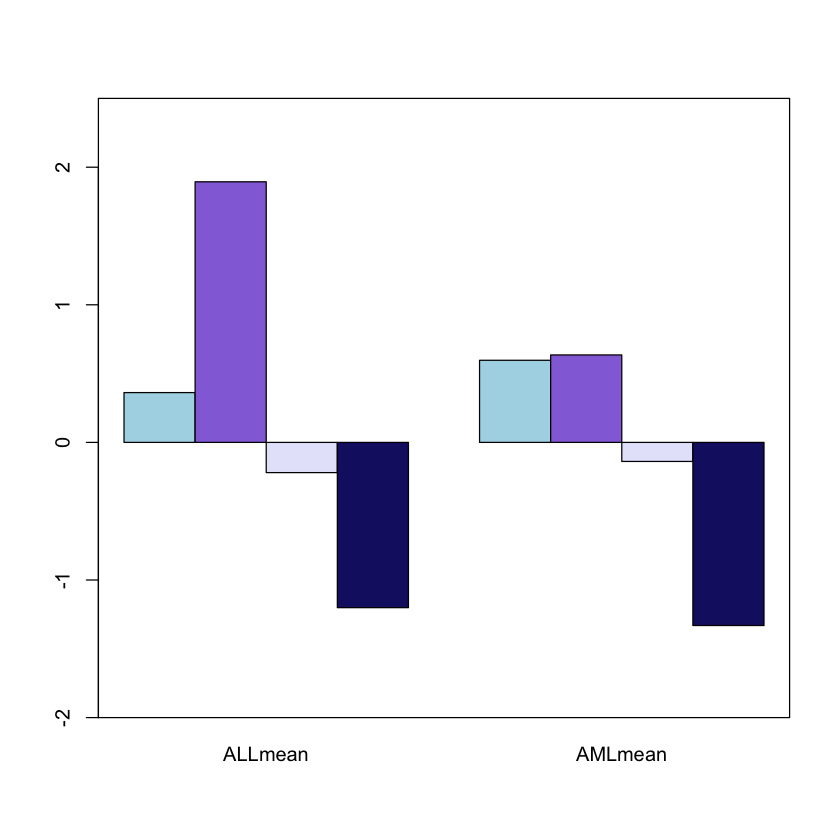

In [18]:
# Calculating the mean
ALLmean <- rowMeans(golub[c(85,1042,1212,2240),c(1:27)])
AMLmean <- rowMeans(golub[c(85,1042,1212,2240),c(28:38)])

# Combining the mean matrices previously calculated
dataheight <- cbind(ALLmean, AMLmean)

# Plotting 
barx <- barplot(dataheight, beside=T, horiz=F, col= colours, ylim=c(-2,2.5))
box()

### 1.6\. Adding error bars to the previous plot

In [19]:
# Calculating the SD
ALLsd <- apply(golub[c(85,1042,1212,2240),c(1:27)], 1, sd)
nALL=length(c(1:27))
AMLsd <- apply(golub[c(85,1042,1212,2240),c(28:38)], 1, sd)
nAML=length(c(28:38))

datasd <- cbind(ALLsd, AMLsd)
datase <- cbind(ALLsd/sqrt(nALL), AMLsd/sqrt(nAML))


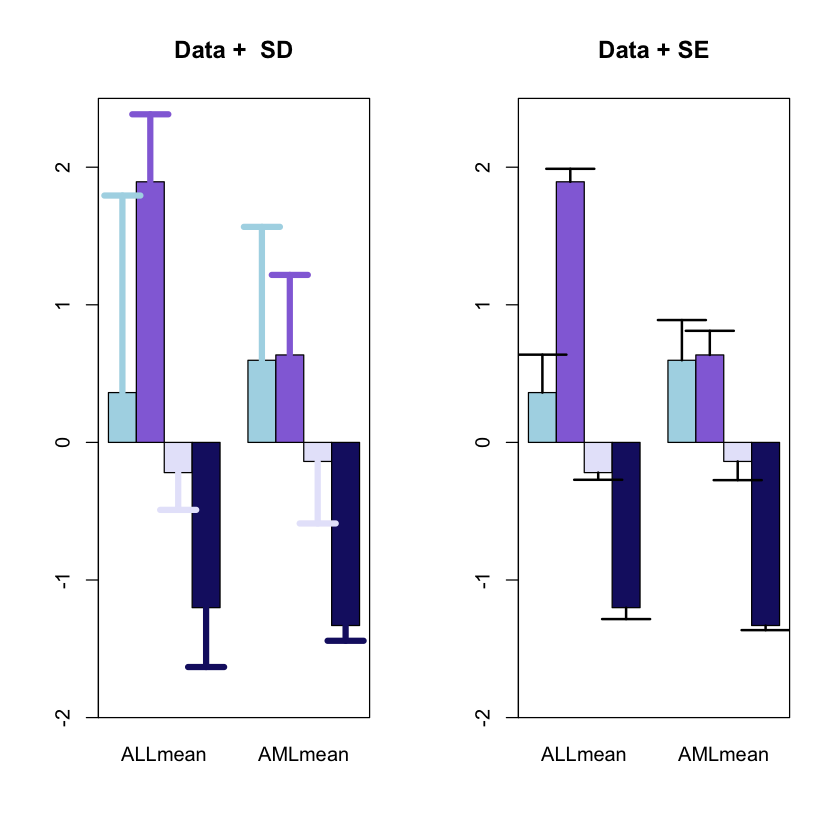

In [20]:
# creating a panel of 2 plots displayed in 1 row
par(mfrow = c(1,2))

# Plot with the SD
datasdend<-abs(dataheight) + abs(datasd)
datasdend[c(3,4),] = - datasdend[c(3,4),]
barx <- barplot(dataheight, beside=T, horiz=F, col= colours, ylim=c(-2,2.5),
               main = 'Data +  SD')

arrows(barx, dataheight, barx, datasdend, angle=90, lwd=5, length=0.15, 
       col = colours)
box()

# Plot with the se: error associated to the mean!
datasdend<-abs(dataheight) + abs(datase)
datasdend[c(3,4),] = -datasdend[c(3,4),]
barx <- barplot(dataheight, beside=T, horiz=F, col =colours, ylim=c(-2,2.5),
               main = 'Data + SE')

arrows(barx, dataheight, barx, datasdend, angle=90, lwd=2, length=0.2,
       col = 1)
box()

## 2. Exploring some types of plots


### 2.1 Frequency table 
Discrete data occur when the values naturally fall into categories. A frequency table simply gives the number of occurrences within a category.

A gene consists of a sequence of nucleotides (A; C; G; T)

The number of each nucleotide can be displayed in a frequency table.

This will be illustrated by the Zyxin gene which plays an important role in cell adhesion The accession number (X94991.1) of one of its variants can be found in a data base like NCBI (UniGene). The code below illustrates how to read the sequence ”X94991.1” of the species homo sapiens from GenBank, to construct a
pie from a frequency table of the four nucleotides .

In [21]:
library('ape')

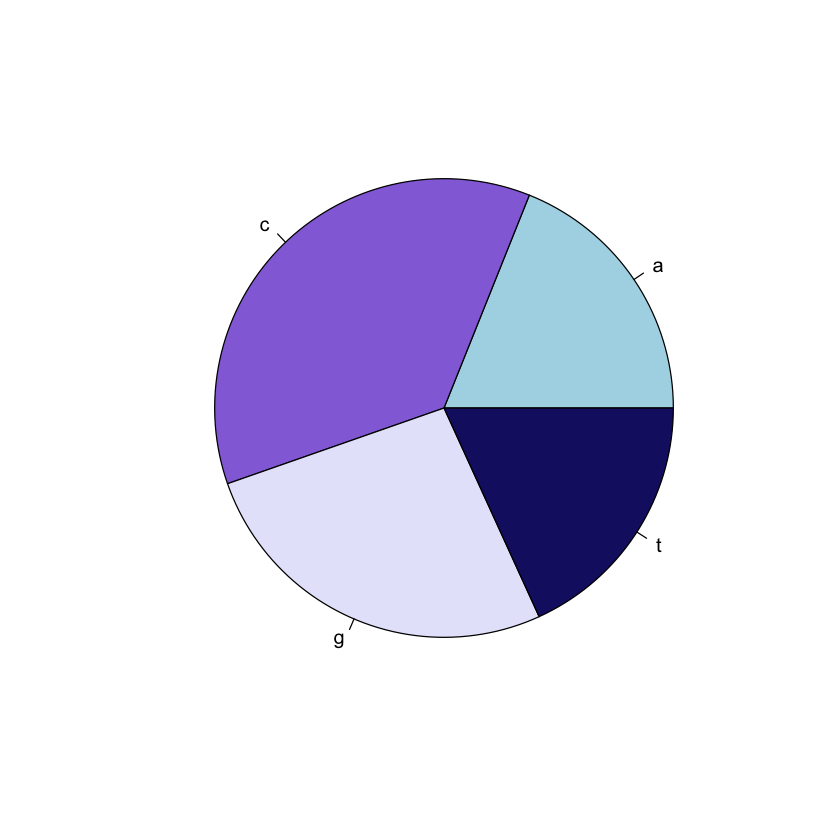

In [22]:
v = read.GenBank(c("X94991.1"),as.character = TRUE)

pie(table(v$X94991.1), col = colours)

### 2.2 Stripcharts

An elementary method to visualize data is by using a so-called stripchart,
by which the values of the data are represented as e.g. small boxes
it is useful in combination with a factor that distinguishes members from
different experimental conditions or patients groups.

Once again we use the CCND3 Cyclin D3 data to generate the plots.

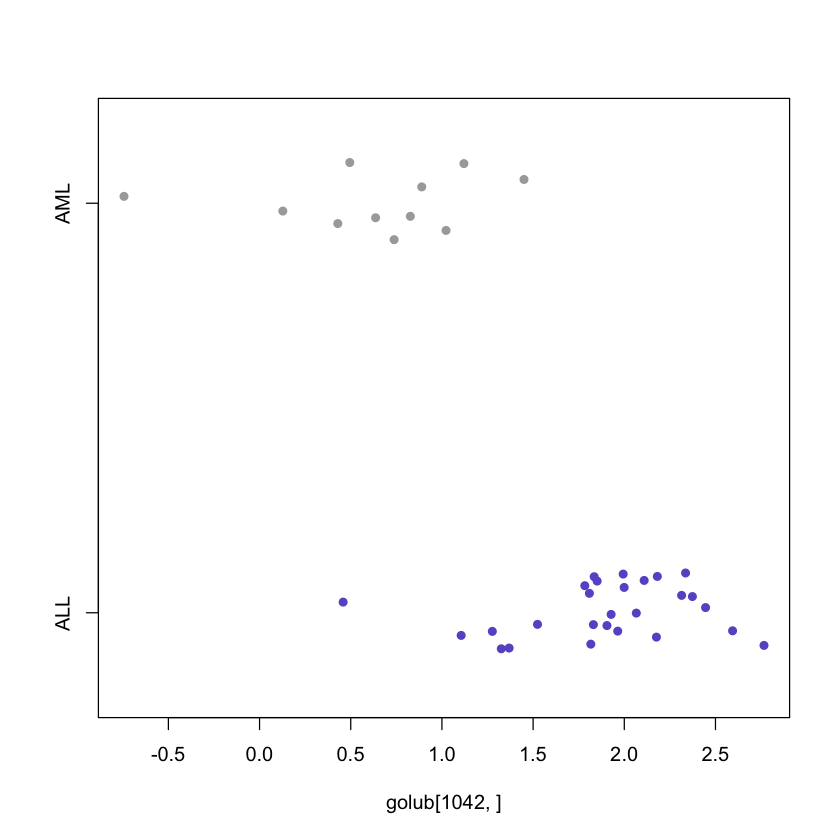

In [42]:
# data(golub, package = "multtest")
gol.fac <- factor(golub.cl,levels=0:1, labels= c("ALL","AML"))

stripchart(golub[1042,] ~ gol.fac, method = "jitter", 
           col = c('slateblue', 'darkgrey'), pch = 16)


To produce two adjacent stripcharts one for the ALL and one for the AML patients, we use the factor called `gol.fac`. From the above figure, it can be observed that the CCND3 Cyclin D3 expression values of the ALL patients tend to have larger expression values than those of the AML patient.

### 2.3 Histograms 

Another method to visualize data is by dividing the range of data values into
a number of intervals and to plot the frequency per interval as a bar. Such
a plot is called a histogram.

We will now generate a histogram of the expression values of gene CCND

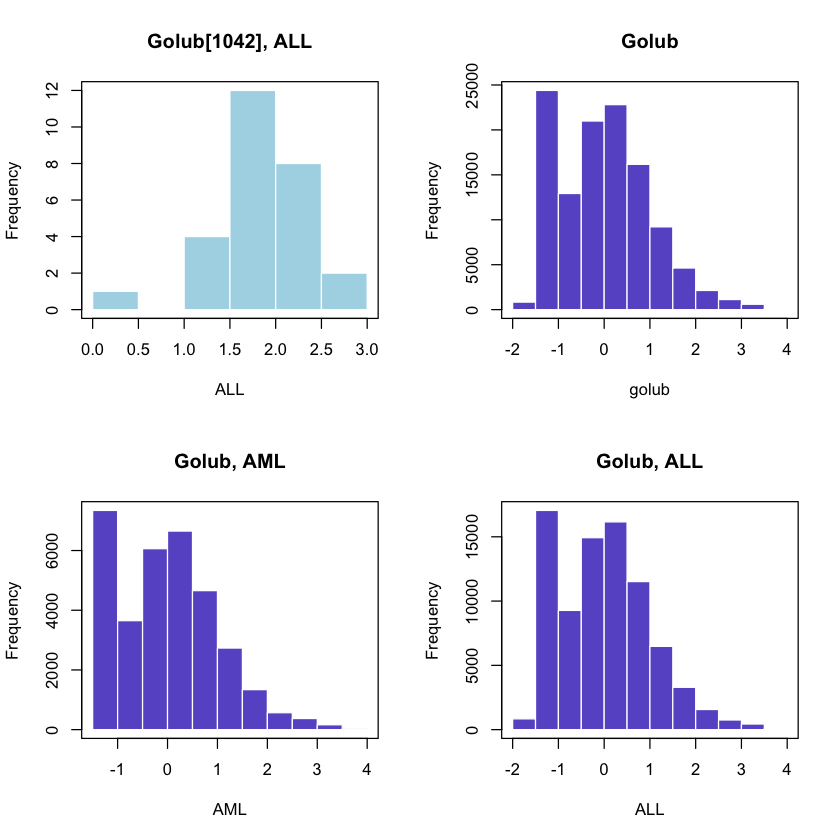

In [24]:
par(mfrow=c(2,2))

hist(golub[1042, gol.fac == "ALL"], 
     col = 'lightblue', border = 'white',
    main = 'Golub[1042], ALL', xlab = 'ALL')
box()

hist(golub,breaks = 10, 
    col = 'slateblue', border = 'white',
    main =  'Golub')
box()

hist(golub[, gol.fac == "AML"],breaks = 10, 
     col = 'slateblue', border = 'white',
    main = 'Golub, AML', xlab = 'AML')
box()

hist(golub[, gol.fac == "ALL"],breaks = 10,
     col = 'slateblue', border = 'white',
    main = 'Golub, ALL', xlab = 'ALL')
box()

### 2.3 Boxplots

A popular method to display data is by
drawing a box around the Ørst and the third quartile (a bold line segment                                                     for the median), and the smaller line segments (whiskers) for the smallest and
the largest data values. Such a data display is known as a box-and-whisker
plot

In [25]:
# Sort the values of one gene
x <- sort(golub[1042, gol.fac=="ALL"], decreasing = FALSE)
x[1:5]

0       0       0       0       0 
0.45827 1.10546 1.27645 1.32551 1.36844

A view on the distribution of the gene expression values of the `ALL` and `AML` patients on gene CCND3 Cyclin D3 can be obtained by construction two separate boxplots adjacent to each other:

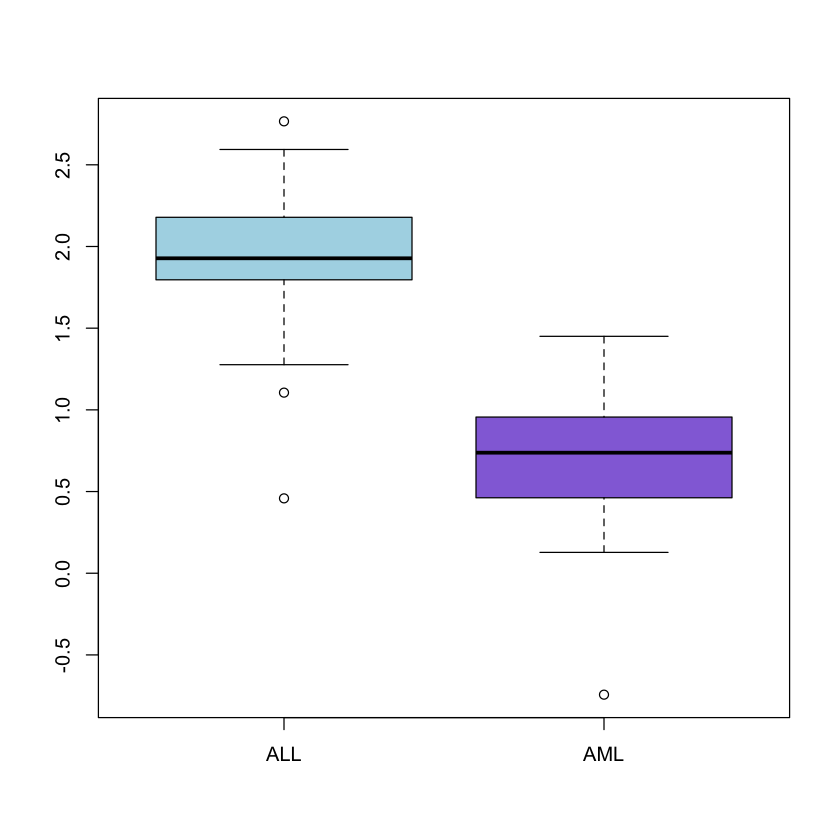

In [26]:
# Even though we are creating two boxplots we only need one major graph
par(mfrow=c(1,1))
boxplot(golub[1042,] ~ gol.fac, col = c('lightblue', 'mediumpurple'))


It can be observed that the gene expression values for ALL are larger than those for AML. Furthermore, since the two sub-boxes around the median are more or less equally wide, the data are quite symmetrically distributed around the median.

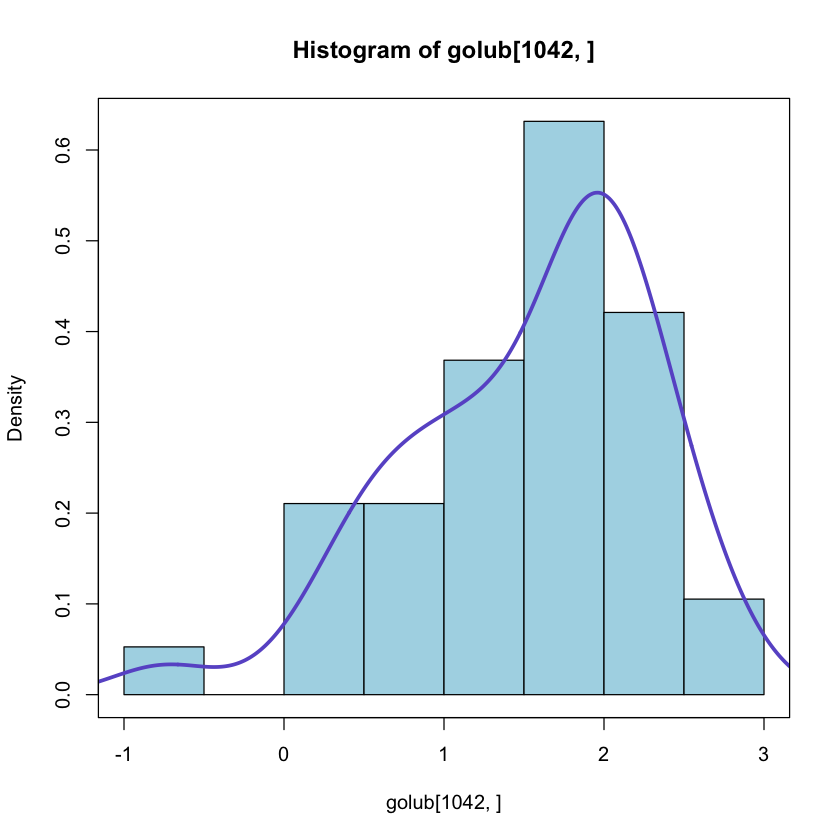

In [27]:

hist(golub[1042,], col= 'lightblue', border= 'black', breaks= 6, freq= F)
lines(density(golub[1042,]), col= 'slateblue', lwd = 3)
box()

Now we can observe the distribution of all gene expressions values in all 38 patients

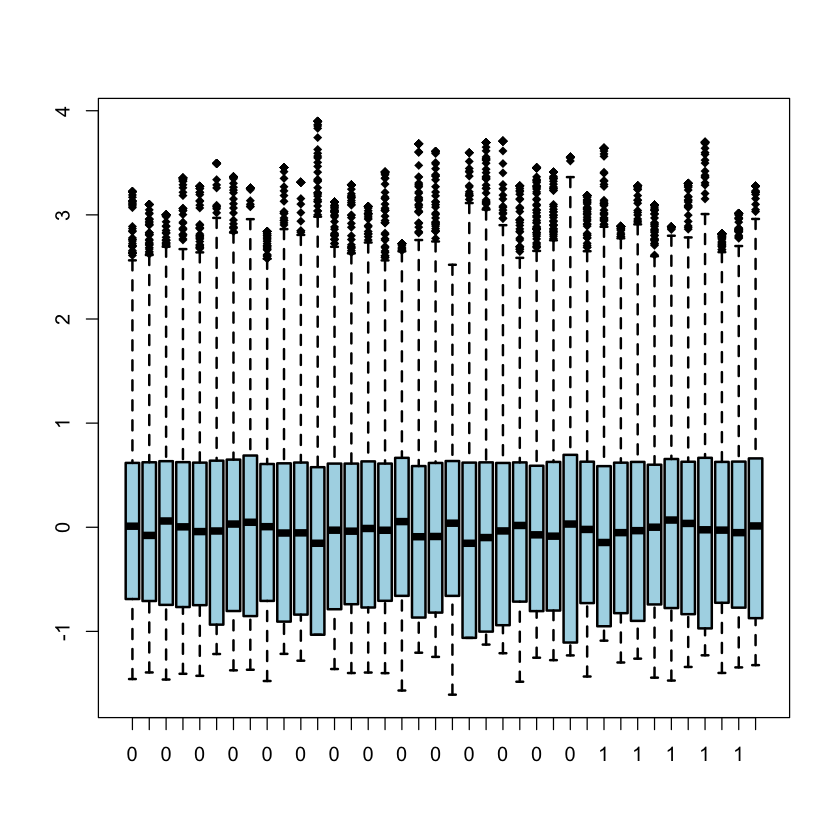

In [28]:
boxplot(golub, col= 'lightblue', lwd=2, border="black", pch=18)

To compute exact values for the quartiles we need a sequence running from 0 to 1 with increments in steps of 0.25

In [29]:
pvec <- seq(0, 1, 0.25)
quantile(golub[1042, gol.fac=='ALL'], pvec)

0%      25%      50%      75%     100% 
0.458270 1.796065 1.927760 2.178705 2.766100

Outliers are data points lying far apart from the pattern set by the majority of the data values. The implementation in R of the boxplot draws such outliers as smalle circles. 

A data point `x` is defined (graphically, not statistically) as an outlier point if $$x < 0.25 x -1.5\left(0.75 x -0.25 x\right) [x>0.25x >1.5(0.75x-0.25x)]$$


### 2.4 Q-Q plots

A method to visualize the distribution of gene expression values is y the so-called quantile-quantile (Q-Q) plots. In such a plot the quantiles of the gene expression values are displayed against the corresponding quantiles of the normal distribution (bell-shaped).


To produce a Q-Q plot of the ALL gene expression values of CCND3 Cyclin D3 one may use the following.

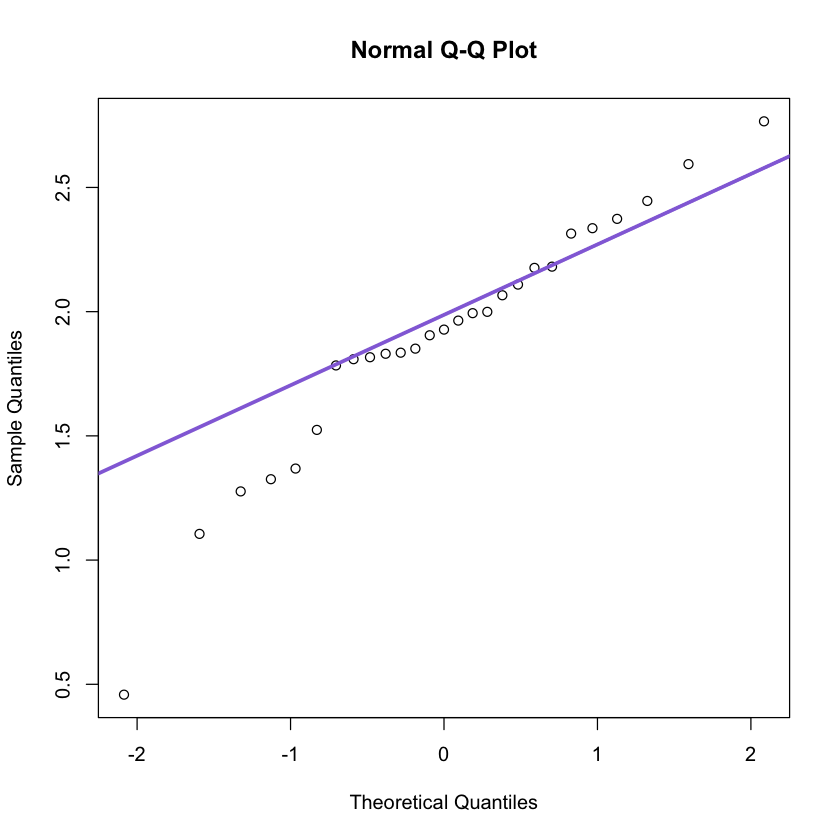

In [30]:
qqnorm(golub[1042, gol.fac == 'ALL'])
qqline(golub[1042, gol.fac == 'ALL'], col = 'mediumpurple', lwd = 3)

It can be seen that most of the data points are on or near the straight line, while a few others are further away. The above example illustrates a case where the degree of non-normality is moderate so that a clear conclusion cannot be drawn.


## 3. Loading tab-delimited data

In [31]:
mydata<-read.delim("./NeuralStemCellData.tab.txt", row.names=1, header=T)

In [32]:
class(mydata)

[1] "data.frame"

### Now try and do some exploratory analysis of your own on this data!


GvHD flow cytometry data

Only exract the CD3 positive cells


[1] 0.9560214

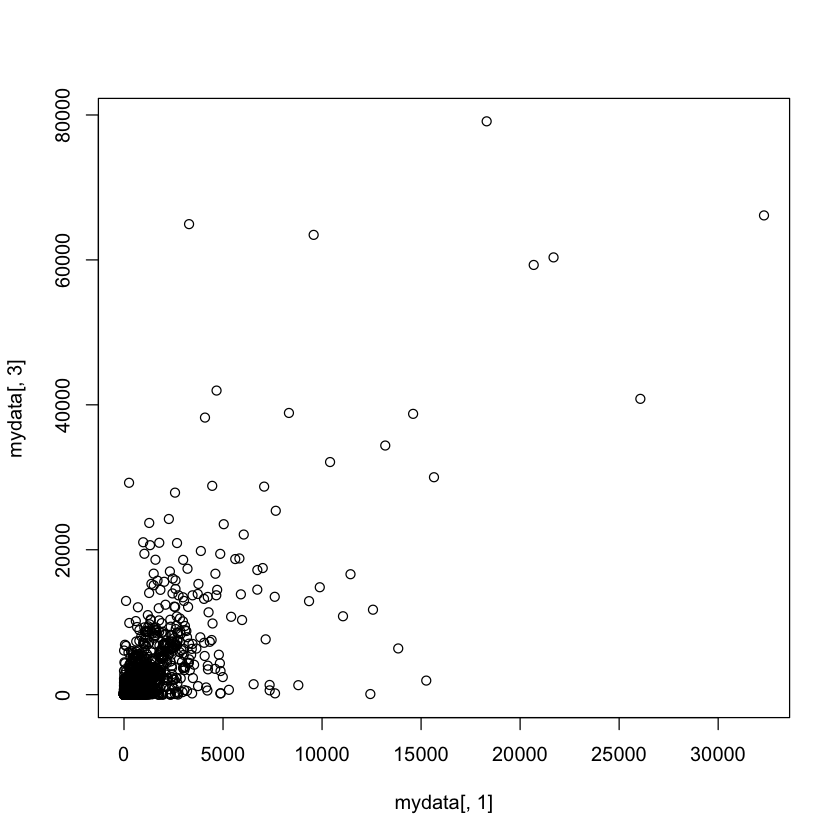

In [33]:
cor(mydata[,1],mydata[,2])
plot(mydata[,1],mydata[,3])